# Overview

In this competition, you’ll develop an NLP model driven by ML to accurately predict the affinity 
between misconceptions and incorrect answers (distractors) in multiple-choice questions. 
This solution will suggest candidate misconceptions for distractors, making it easier for expert human teachers to tag distractors with misconceptions.

# Description

A Diagnostic Question is a multiple-choice question with four options: one correct answer and three distractors (incorrect answers). 
Each distractor is carefully crafted to capture a specific misconception. For example:

![sample.png](sample.png)

If a student selects the distractor "13," they may have the misconception "Carries out operations from left to right regardless of priority order."

Tagging distractors with appropriate misconceptions is essential but time|consuming, 
and it is difficult to maintain consistency across multiple human labellers. 
Misconceptions vary significantly in terms of description granularity, and new misconceptions are often discovered 
as human labellers tag distractors in new topic areas.

Initial efforts to use pre|trained language models have not been successful, likely due to the complexity of the mathematical content in the questions. Therefore, a more efficient and consistent approach is needed to streamline the tagging process and enhance the overall quality.

This competition challenges you to develop a Natural Language Processing (NLP) model driven by Machine Learning (ML) that predicts the affinity between misconceptions and distractors. The goal is to create a model that not only aligns with known misconceptions but also generalizes to new, emerging misconceptions. Such a model would assist human labelers in accurately selecting suitable misconceptions from both existing and newly identified options.

Your work could help improve the understanding and management of misconceptions, enhancing the educational experience for both students and teachers.

Eedi, alongside Vanderbilt University, and together with ​The Learning Agency Lab, an independent nonprofit based in Arizona, have collaborated with Kaggle on this competition.

# Dataset Description

On Eedi, students answer Diagnostic Questions (DQs), which are multiple-choice questions featuring one correct answer and three incorrect answers, 
known as distractors. Each question targets a specific construct (also referred to as a skill), representing the most granular level of knowledge relevant to the question. 

Each distractor is designed to correspond with a potential misconception. Below is an example of a DQ:

![sample2.png](sample2.png)

In this example, the options for the question are labeled with misconceptions as follows:

    A: Divides total amount by each side of the ratio instead of dividing by the sum of the parts
    B: Mixes up sides of a ratio
    C: Finds one part of a ratio but doesn't multiply that by the number of parts needed
    D: Correct answer

The Diagnostic Questions were originally presented in image format, and the text, including mathematical content, has been extracted using a human-in-the-loop OCR process.

File and Field Information

### [misconception_mapping].csv

| MisconceptionId   |     MisconceptionName                                                                     |
| ---               | ---                                                                                       |
| 0                 | "Does not know that angles in a triangle sum to 180 degrees"                              |
| 1                 | "Uses dividing fractions method for multiplying fractions "                               |
| 706               | "Carries out operations from right to left regardless of priority order"                  |
| 1672              | "Confuses the order of operations, believes addition comes before multiplication "        |
| 1287              | "Believes if you changed all values by the same proportion the range would not change"    |
| 1073              | "Believes if you add the same value to all numbers in the dataset the range will change"  |

### [train/test].csv

| QuestionId    | Unique question identifier (int).     |
| ---           | ---                                   |
| ConstructId   | Unique construct identifier (int) .   |
| ConstructName | Most granular level of knowledge related to question (str). |
| CorrectAnswer | A, B, C or D (char).                  |
| SubjectId | Unique subject identifier (int).          |
| SubjectName | More general context than the construct (str). |
| QuestionText | Question text extracted from the question image using human-in-the-loop OCR (str) . |
| Answer[A/B/C/D]Text | Answer option A text extracted from the question image using human-in-the-loop OCR (str). |
| Misconception[A/B/C/D]Id | Unique misconception identifier (int). Ground truth labels in train.csv; your task is to predict these labels for test.csv. |
| misconception_mapping.csv | maps MisconceptionId to its MisconceptionName |
| sample_submission.csv | A submission file in the correct format. |
| QuestionId_Answer | Each question has three incorrect answers for which need you predict the MisconceptionId. |
| MisconceptionId | You can predict up to 25 values, space delimited. |

EXAMPLE 1:
| Label             | Value                         |
| ---               | ---                           | 
| QuestionId        | 0                             |
| ConstructId       | 856                           |
| ConstructName     | Use the order of operations to carry out calculations involving powers  |
| SubjectId         | 33                            |
| SubjectName       | BIDMAS                        |
| CorrectAnswer     | A                             |
| QuestionText      | "\[   3 \times 2+4-5   \] Where do the brackets need to go to make the answer equal \( 13 \) ?" |
| AnswerAText       | \(  3 \times(2+4)-5    \)     |
| AnswerBText       | \(  3 \times 2+(4-5)   \)     |
| AnswerCText       | \(  3 \times(2+4-5)    \)     |
| AnswerDText       | Does not need brackets        |
| MisconceptionAId  |
| MisconceptionBId  |
| MisconceptionCId  |
| MisconceptionDId  |    1672.0                     |


EXAMPLE 2:
| Label             | Value                                             |
| ---               | ---                                               | 
| QuestionId        | 2                                                 |
| ConstructId       | 2774                                              |
| ConstructName     | Calculate the range from a list of data           |  
| SubjectId         | 339                                               |
| SubjectName       | Range and Interquartile Range from a List of Data |
| CorrectAnswer     | B                                                 |
| QuestionText      | "Tom and Katie are discussing the \( 5 \) plants with these heights: \( 24 \mathrm{~cm} 17 \mathrm{~cm} 42 \mathrm{~cm}, 26 \mathrm{~cm} 13 \mathrm{~cm} \) Tom says if all the plants were cut in half, the range wouldn't change. Katie says if all the plants grew by \( 3 \mathrm{~cm} \) each, the range wouldn't change. Who do you agree with?`                             |
| AnswerAText       | "Only Tom"                                        |
| AnswerBText       | "Only Katie"                                        |  
| AnswerCText       | Both Tom and Katie                                        |
| AnswerDText       | Neither is correct                                         |   
| MisconceptionAId  | 1287.0                                        |
| MisconceptionBId  |
| MisconceptionCId  | 1287.0                                        |
| MisconceptionDId  | 1073.0                                        |
    
Please note that this is a Code Competition. The hidden test set has approximately 1,000 questions.

# Objective
Create a model that predicts or identify misconceptions from the distraction.

# Import

In [36]:
!pip3 install -q -U transformers --no-index --find-links /kaggle/input/hf-libraries/transformers

ERROR: Could not find a version that satisfies the requirement transformers (from versions: none)
ERROR: No matching distribution found for transformers


In [83]:
import numpy as np
import pandas as pd
import random as rand
import matplotlib.pyplot as plt

from pprint import pprint
from tqdm import tqdm
from IPython.display import display
from sklearn.metrics.pairwise import cosine_similarity
# from transformers import pipeline, AutoTokenizer, AutoModelForCausalLM, AutoModel


# Preliminary questions
* How does the misconception mapped to the subject matter?
* How can we populate the top 25 misconception to a distraction

# Data Load

The `misconception_mapping.csv` provides the id mapping of the known misconception in the entire dataset

In [43]:
raw_misconception_df = pd.read_csv("misconception_mapping.csv")
raw_misconception_df.head(10)

,MisconceptionId,MisconceptionName
0,0,Does not know that angles in a triangle sum to...
1,1,Uses dividing fractions method for multiplying...
2,2,Believes there are 100 degrees in a full turn
3,3,Thinks a quadratic without a non variable term...
4,4,Believes addition of terms and powers of terms...
5,5,"When measuring a reflex angle, gives the acute..."
6,6,Can identify the multiplier used to form an eq...
7,7,Believes gradient = change in y
8,8,Student thinks that any two angles along a str...
9,9,Thinks there are 180 degrees in a full turn


In [44]:
raw_sample_df = pd.read_csv("sample_submission.csv")
raw_sample_df

,QuestionId_Answer,MisconceptionId
0,1869_A,1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 1...
1,1869_B,1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 1...
2,1869_C,1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 1...
3,1870_B,1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 1...
4,1870_C,1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 1...
5,1870_D,1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 1...
6,1871_A,1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 1...
7,1871_C,1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 1...
8,1871_D,1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 1...


In [99]:
raw_test_df = pd.read_csv("test.csv")
raw_test_df

,QuestionId,ConstructId,ConstructName,SubjectId,SubjectName,CorrectAnswer,QuestionText,AnswerAText,AnswerBText,AnswerCText,AnswerDText
0,1869,856,Use the order of operations to carry out calcu...,33,BIDMAS,A,\[\n3 \times 2+4-5\n\]\nWhere do the brackets ...,\( 3 \times(2+4)-5 \),\( 3 \times 2+(4-5) \),\( 3 \times(2+4-5) \),Does not need brackets
1,1870,1612,Simplify an algebraic fraction by factorising ...,1077,Simplifying Algebraic Fractions,D,"Simplify the following, if possible: \( \frac{...",\( m+1 \),\( m+2 \),\( m-1 \),Does not simplify
2,1871,2774,Calculate the range from a list of data,339,Range and Interquartile Range from a List of Data,B,Tom and Katie are discussing the \( 5 \) plant...,Only\nTom,Only\nKatie,Both Tom and Katie,Neither is correct


In [100]:
raw_train_df = pd.read_csv("train.csv")
sorted_subjects_df = raw_train_df.sort_values(by='SubjectId').copy()
sorted_subjects_df.head(10)


,QuestionId,ConstructId,ConstructName,SubjectId,SubjectName,CorrectAnswer,QuestionText,AnswerAText,AnswerBText,AnswerCText,AnswerDText,MisconceptionAId,MisconceptionBId,MisconceptionCId,MisconceptionDId
0,0,856,Use the order of operations to carry out calcu...,33,BIDMAS,A,\[\n3 \times 2+4-5\n\]\nWhere do the brackets ...,\( 3 \times(2+4)-5 \),\( 3 \times 2+(4-5) \),\( 3 \times(2+4-5) \),Does not need brackets,NaN,NaN,NaN,1672.0
587,587,854,Use the order of operations to carry out calcu...,33,BIDMAS,D,Problem P: \( 6 \div 3+5= \)\nProblem Q: \( 6 ...,Problem P: \( 3+5 \)\nProblem Q: \( 3 \times 5 \),Problem P: \( 3+5 \)\nProblem Q: \( 6 \div 3 \),Problem P: \( 6 \div 3 \)\nProblem Q: \( 3 \ti...,Problem P: \( 6 \div 3 \)\nProblem Q: \( 6 \di...,706.0,15.0,2306.0,NaN
1728,1728,457,Answer fraction problems that require the use ...,33,BIDMAS,C,\( \frac{3}{4}-\frac{1}{4} \times \frac{1}{5}= \),\( \frac{2}{16} \),\( \frac{1}{10} \),\( \frac{7}{10} \),\( \frac{5}{10} \),907.0,1507.0,NaN,NaN
695,695,854,Use the order of operations to carry out calcu...,33,BIDMAS,B,\( 18 \div 2+2 \times 2= \),\( 3 \),\( 13 \),\( 22 \),\( 12 \),15.0,NaN,1507.0,NaN
728,728,3120,Insert brackets to make a calculation correct,33,BIDMAS,D,Add brackets to this calculation to make the a...,\( 16-(6+4) \div 2 \),\( (16-6)+4 \div 2 \),\( 16-6+(4 \div 2) \),\( (16-6+4) \div 2 \),1507.0,1507.0,1507.0,NaN
746,746,855,Use the order of operations to carry out calcu...,33,BIDMAS,B,\( 4+12 \div(2+2)= \),\( 10 \),\( 7 \),\( 12 \),\( 4 \),1507.0,NaN,2488.0,1862.0
361,361,71,Solve problems that combine addition and subtr...,33,BIDMAS,A,"![Think of a number, then subtract \( 5 \), ne...",Only\nJo,Only\nPaul,Both Jo and Paul,Neither is correct,NaN,NaN,NaN,1507.0
858,858,855,Use the order of operations to carry out calcu...,33,BIDMAS,B,Problem P: \( (4+5)^{2}= \)\nProblem Q: \( 4+5...,Problem P: \( 4+5 \)\nProblem Q: \( 4+5 \),Problem P: \( 4+5 \)\nProblem Q: \( 5^{2} \),Problem P: \( 5^{2} \)\nProblem Q: \( 4+5 \),Problem P: \( 5^{2} \)\nProblem Q: \( 5^{2} \),1507.0,NaN,NaN,2488.0
895,895,855,Use the order of operations to carry out calcu...,33,BIDMAS,B,\[\n9-8+5\n\]\nJo and Paul are trying to make ...,Only\nJo,Only\nPaul,Both Jo and Paul,Neither is correct,2488.0,NaN,2488.0,2306.0
899,899,854,Use the order of operations to carry out calcu...,33,BIDMAS,C,\[\n10-8 \times 7+6=\n\]\n\nWhich calculation ...,\( 7+6 \),\( 10-8 \),\( 8 \times 7 \),It doesn't matter: you get the same answer,706.0,1507.0,NaN,2532.0


## Distribution of Question Items Across Key Mathematical Subjects

The data shows that subjects like "Linear Equations," "Linear Sequences (nth term)," "BIDMAS," and "Quadratic Equations" have the most question items, with counts ranging from 36 to 53, indicating a stronger focus on these topics. In contrast, subjects such as "Written Addition" and "Exact Values of Trigonometric Ratios" have only one question each, highlighting a lesser emphasis on these areas. This distribution suggests that some mathematical topics are prioritized more heavily in assessments.

In [112]:
subjects_df = pd.DataFrame(
    sorted_subjects_df[['SubjectId', 'SubjectName']].value_counts().reset_index(name='QuestionCount')
)

subjects_df

,SubjectId,SubjectName,QuestionCount
0,64,Linear Equations,53
1,171,Linear Sequences (nth term),44
2,33,BIDMAS,37
3,65,Quadratic Equations,36
4,75,Area of Simple Shapes,36
...,...,...,...
158,205,Written Addition,1
159,282,Exact Values of Trigonometric Ratios,1
160,110,Experimental Probability and Relative Frequency,1
161,337,Types of Data and Questionnaires,1


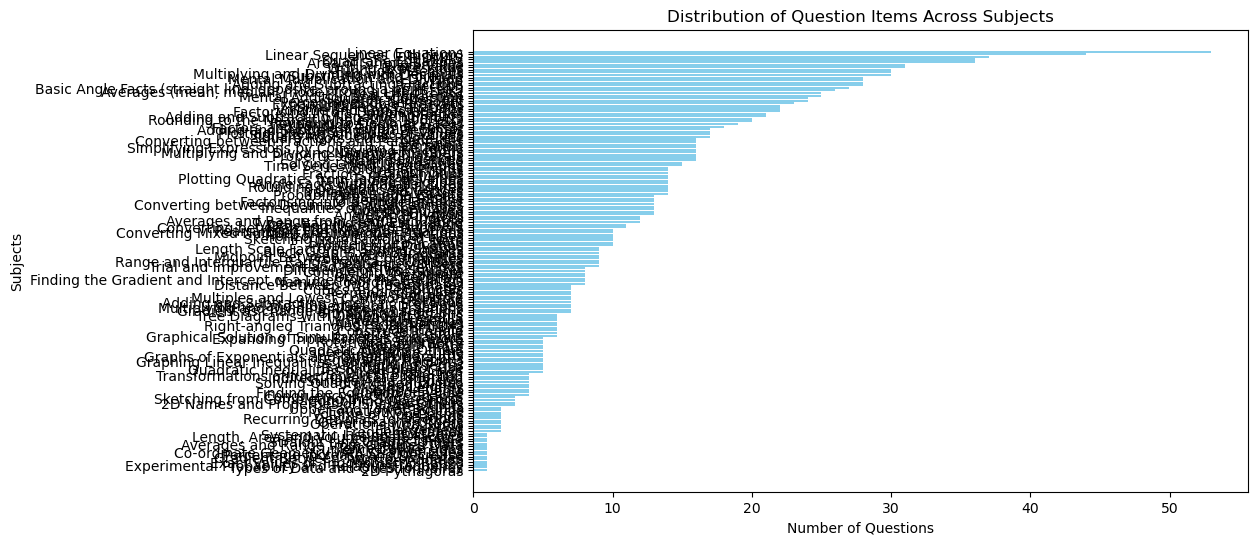

In [98]:
# Plot the distribution
plt.figure(figsize=(10, 6))
plt.barh(subjects_df['SubjectName'], subjects_df['QuestionCount'], color='skyblue')
plt.xlabel('Number of Questions')
plt.ylabel('Subjects')
plt.title('Distribution of Question Items Across Subjects')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest counts at the top
plt.show()

In [102]:
sorted_construct_df = raw_train_df.sort_values(by='ConstructId').copy()
sorted_construct_df.head(10)


,QuestionId,ConstructId,ConstructName,SubjectId,SubjectName,CorrectAnswer,QuestionText,AnswerAText,AnswerBText,AnswerCText,AnswerDText,MisconceptionAId,MisconceptionBId,MisconceptionCId,MisconceptionDId
870,870,4,Count a number of objects,172,Quadratic Sequences,D,"\[\n1,3,5,7, \ldots ?\n\]\n\nWhich pattern mat...",![A sequence of 4 patterns. The first pattern ...,![A sequence of 4 patterns. The first pattern ...,![A sequence of 4 patterns. The first pattern ...,![A sequence of 4 patterns. The first pattern ...,142.0,142.0,108.0,NaN
1109,1109,4,Count a number of objects,172,Quadratic Sequences,C,"\[\n1,3,6,10, \ldots \text { ? }\n\]\n\nWhich ...",![The square numbers represented by green circ...,"![The cube numbers represented by small, pale,...",![The triangle numbers represented by dark blu...,![A sequence represented using red circles arr...,142.0,142.0,NaN,108.0
28,28,10,Count backwards in steps of of something other...,200,Counting,C,George is counting backwards in steps of \( 5 ...,"\( 19,102 \)","\( 19,099 \)","\( 19,098 \)","\( 19,097 \)",878.0,1824.0,NaN,NaN
824,824,10,Count backwards in steps of of something other...,200,Counting,D,Amelie is counting backwards in steps of \( 4 ...,"\( 24,988 \)","\( 24,992 \)","\( 24,990 \)","\( 24,989 \)",NaN,878.0,1824.0,NaN
1325,1325,18,Write 3 digit numbers as words,202,Place Value,B,How do you write this number in words?\n\( 107 \),Ten seven,One hundred and seven,One hundred and seventy,Seventeen,1244.0,NaN,1244.0,1244.0
204,204,20,Write 5 digit numbers and above as words,202,Place Value,B,How do you write this number in words?\n\(\n20...,Two million and four thousand and fifty,Two hundred and four thousand and fifty,Two hundred and four and fifty,Two hundred and forty thousand and fifty,874.0,NaN,2327.0,NaN
284,284,20,Write 5 digit numbers and above as words,202,Place Value,D,How do you write this number in words?\n\n\( 6...,Six hundred and thirty-two,Six thousand three hundred and two,Sixty thousand and thirty-two,Sixty thousand three hundred and two,539.0,22.0,2546.0,NaN
186,186,26,Express words as 5 digit numbers and above,202,Place Value,C,How do you write this number in digits?\nFifty...,\( 5613 \),\( 56030 \),\( 56013 \),\( 560013 \),1526.0,1525.0,NaN,22.0
1367,1367,27,Recognise integers expressed visually,202,Place Value,C,What number is represented below? ![An image s...,\( 431 \),\( 341 \),\( 143 \),\( 134 \),1556.0,NaN,NaN,1556.0
1724,1724,28,Recognise the place value of each digit in int...,202,Place Value,C,What is the value of the \( 4 \) in this numbe...,\( 4 \),\( 40 \),\( 400 \),\( 4000 \),2375.0,2546.0,NaN,2565.0


In [105]:
constructs_df = pd.DataFrame(
    sorted_construct_df[['ConstructId', 'ConstructName']].value_counts().reset_index(name='QuestionCount')
)

constructs_df

,ConstructId,ConstructName,QuestionCount
0,473,Calculate the square of a number,14
1,1470,"Solve two-step linear equations, with the vari...",13
2,1428,Factorise a quadratic expression in the form x...,13
3,854,Use the order of operations to carry out calcu...,12
4,3346,Identify the order of rotational symmetry of a...,12
...,...,...,...
752,953,"Given a gradient, state the gradient of a line...",1
753,2144,Convert between g and kg,1
754,2142,Complete multi-step conversions of mass that u...,1
755,2141,Convert between g and mg,1


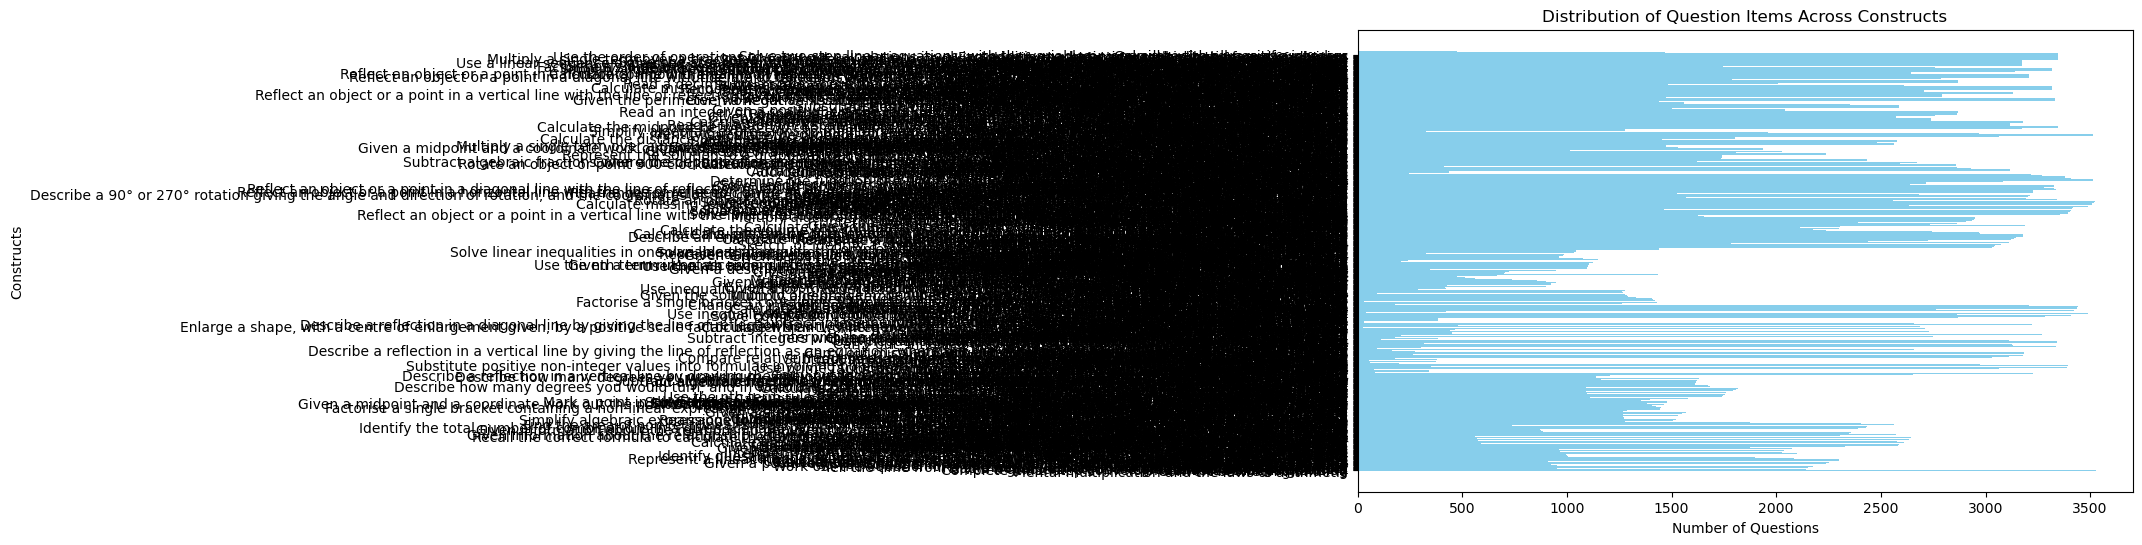

In [115]:
# Plot the distribution
plt.figure(figsize=(10, 6))
plt.barh(constructs_df['ConstructName'], constructs_df['ConstructId'], constructs_df['QuestionCount'], color='skyblue')
plt.xlabel('Number of Questions')
plt.ylabel('Constructs')
plt.title('Distribution of Question Items Across Constructs')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest counts at the top
plt.show()

# Preprocess

In [126]:
def convertToText(df):
    # Construct the full question and answer text by concatenating relevant columns
    df['All_question_text'] = "Subject: " + df['SubjectName'] + ", Construct: " + df['ConstructName'] + ", Question: " + df['QuestionText']
    return df

train = convertToText(raw_train_df)
test = convertToText(raw_test_df)
train.drop('all_question_text', axis=1)

,QuestionId,ConstructId,ConstructName,SubjectId,SubjectName,CorrectAnswer,QuestionText,AnswerAText,AnswerBText,AnswerCText,AnswerDText,MisconceptionAId,MisconceptionBId,MisconceptionCId,MisconceptionDId,all_question_answer,All_question_text
0,0,856,Use the order of operations to carry out calcu...,33,BIDMAS,A,\[\n3 \times 2+4-5\n\]\nWhere do the brackets ...,\( 3 \times(2+4)-5 \),\( 3 \times 2+(4-5) \),\( 3 \times(2+4-5) \),Does not need brackets,NaN,NaN,NaN,1672.0,\[\n3 \times 2+4-5\n\]\nWhere do the brackets ...,"Subject: BIDMAS, Construct: Use the order of o..."
1,1,1612,Simplify an algebraic fraction by factorising ...,1077,Simplifying Algebraic Fractions,D,"Simplify the following, if possible: \( \frac{...",\( m+1 \),\( m+2 \),\( m-1 \),Does not simplify,2142.0,143.0,2142.0,NaN,"Simplify the following, if possible: \( \frac{...","Subject: Simplifying Algebraic Fractions, Cons..."
2,2,2774,Calculate the range from a list of data,339,Range and Interquartile Range from a List of Data,B,Tom and Katie are discussing the \( 5 \) plant...,Only\nTom,Only\nKatie,Both Tom and Katie,Neither is correct,1287.0,NaN,1287.0,1073.0,Tom and Katie are discussing the \( 5 \) plant...,Subject: Range and Interquartile Range from a ...
3,3,2377,Recall and use the intersecting diagonals prop...,88,Properties of Quadrilaterals,C,The angles highlighted on this rectangle with ...,acute,obtuse,\( 90^{\circ} \),Not enough information,1180.0,1180.0,NaN,1180.0,The angles highlighted on this rectangle with ...,"Subject: Properties of Quadrilaterals, Constru..."
4,4,3387,Substitute positive integer values into formul...,67,Substitution into Formula,A,The equation \( f=3 r^{2}+3 \) is used to find...,\( 30 \),\( 27 \),\( 51 \),\( 24 \),NaN,NaN,NaN,1818.0,The equation \( f=3 r^{2}+3 \) is used to find...,"Subject: Substitution into Formula, Construct:..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1864,1864,2774,Calculate the range from a list of data,339,Range and Interquartile Range from a List of Data,C,What is the range of the following numbers?\n\...,\( 5 \),\( 11 \),\( 23 \),\( 16 \),2456.0,691.0,NaN,1349.0,What is the range of the following numbers?\n\...,Subject: Range and Interquartile Range from a ...
1865,1865,2695,"Describe an enlargement, with no centre of enl...",90,Length Scale Factors in Similar Shapes,B,Shape \( Q \) is an enlargement of shape \( P ...,\( 3 \div 11 \),\( 11 \div 3 \),\( 3 \times 11 \),\( 11-3 \),1500.0,NaN,2442.0,1258.0,Shape \( Q \) is an enlargement of shape \( P ...,Subject: Length Scale Factors in Similar Shape...
1866,1866,854,Use the order of operations to carry out calcu...,33,BIDMAS,B,What does the following equal?\n\[\n8-7+10 \ti...,\( 36 \),\( 31 \),\( -29 \),\( 33 \),NaN,NaN,2306.0,1507.0,What does the following equal?\n\[\n8-7+10 \ti...,"Subject: BIDMAS, Construct: Use the order of o..."
1867,1867,2634,Distinguish between congruency and similarity,274,Congruency in Other Shapes,B,Tom and Katie are discussing congruence and si...,Only\nTom,Only Katie,Both Tom and Katie,Neither is correct,2312.0,NaN,2312.0,2312.0,Tom and Katie are discussing congruence and si...,"Subject: Congruency in Other Shapes, Construct..."


In [48]:
def melt(df):
    df = pd.melt(
        df[[
            'QuestionId', 
            'CorrectAnswer',
            'AnswerAText',
            'AnswerBText',
            'AnswerCText',
            'AnswerDText',
        ]],
        id_vars = ["QuestionId", "all_question_text", "CorrectAnswer"],
        var_name = 'Answer',
        value_name = 'value'
    )

test_melt = melt(test_df)
print(test_melt)

KeyError: "The following 'id_vars' are not present in the DataFrame: ['all_question_text']"